# Part B. Neural Network vs. Perceptron

### Question 2 [Neural Network’s Decision Boundary]

### Importing Libraries

In [1]:
library(ggplot2)

In [2]:
####################### GENERAL AUXILIARY FUNCTIONS #######################
list <- structure(NA,class="result")
"[<-.result" <- function(x,...,value) {
  args <- as.list(match.call())
  args <- args[-c(1:2,length(args))]
  length(value) <- length(args)
  for(i in seq(along=args)) {
    a <- args[[i]]
    if(!missing(a)) eval.parent(substitute(a <- v,list(a=a,v=value[[i]])))
  }
  x
}

In [3]:
# reading the data
read.data <- function(file.name, scaling=FALSE) {
  data <- read.csv(file=file.name,head=TRUE,sep=",")
  data <- data[complete.cases(data),] 
  D <- ncol(data)
  x = data[,-D]
  y = data[,D]
  if (isTRUE(scaling)) {
    x = scale(x)
    y = scale(y)
  }
  return (list('x' = x, 'y' = y))
}

In [4]:
#finding the error rate based on true labels
error.rate <- function(Y1, T1){
  if (length(Y1)!=length(T1)){
    stop('error.rate: size of true lables and predicted labels mismatch')
  }
  return (sum(T1!=Y1)/length(T1))
}

### Perceptron Model

In [5]:
####################### PERCEPTRON #######################
## prediction
perceptron.predict <- function(Phi, W){
  return(ifelse(Phi%*%W>=0, +1, -1))
}
## is it a misclassification? if yes, update the weight vector
is.a.miss <- function(Phi, W, T1){
  return((W%*%Phi)*T1<0)
}
## Perceptron Build function
perceptron.build <- function(X1, T1, eta, epsilon = 0.001, tau.max = 300, plotting = FALSE){
  if (length(unique(T1))!=2){
    stop("Perceptron: The input data is not a binary classification problem.")
  }
  if (all(sort(unique(T1)) != c(-1, 1))) {
    stop("Perceptron: The labels are not (-1, +1).")
  }
  
  N1 <- nrow(X1)
  Phi <- as.matrix(cbind(1, X1)) # add a column of 1 as phi_0

  W <- matrix(NA,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
  W[1,] <- 2*runif(ncol(Phi))-1 # Random initial values for weight vector
  error.rec <- matrix(NA,nrow=tau.max, ncol=1) # Placeholder for errors
  error.rec[1] <- error.rate(perceptron.predict(Phi, W[1,]), T1) # record error for initial weights
  tau <- 1 # iteration counter 
  terminate <- FALSE # termination status
  
  while(!terminate){
    # resuffling train data and associated labels:
    indx <- sample(1:N1, replace = FALSE)
    Phi <- Phi[indx,]
    T1 <- T1[indx]
    
    for (i in 1:N1){
      if (tau >= tau.max) {break}
      # look for missclassified samples
      if (is.a.miss(Phi[i,], W[tau,], T1[i])){
        tau <- tau +1                                 # update tau counter
        W[tau,] <- W[tau-1,] + eta * Phi[i,] * T1[i]  # update the weights
        error.rec[tau] <- error.rate(perceptron.predict(Phi, W[tau,]), T1)# update the records
        eta = eta * 0.99                                 # decrease eta
      } 
    }
    
    # recalculate termination conditions
    terminate <- tau >= tau.max | (abs(error.rec[tau] - error.rec[tau-1]) <= epsilon )
    
  }
  if (plotting){
    plot(error.rec[complete.cases(error.rec),], xlab = 'tau', ylab = 'error', main = 'Perceptron')
  }
  W <- W[complete.cases(W),]  # cut the empty part of the matrix (when the loop stops before tau == tau.max)
  return(W[nrow(W),])         # return the last wight vector
}

### Question 2.1 

### Load Task2B_train.csv and Task2B_test.csv sets, plot the training data with classes are marked with different colors.

In [6]:
####################### Assignment 2.B #######################
# Read the datasets
set.seed(1234)          # set random seed
library(ggplot2)        # load libraries
list[X1,T1] <- read.data('Task2B_train.csv') # read training data
T1[T1==0] <- -1         # convert 0 labels to -1 
list[X2,T2] <- read.data('Task2B_test.csv') # read test data
T2[T2==0] <- -1         # convert 0 labels to -1 

In [7]:
#printing the first few lines of train data, train labels, test data and test labels
head(X1)
head(X2)
head(T1)
head(T2)

x1         x2         
1 -0.4365731  0.31994476
2 -0.3351625 -0.60774359
3  0.8914051 -0.11175734
4 -0.1892440  0.83644710
5  0.9231484  0.60879178
6 -0.8316286 -0.09605136

x1         x2        
1  0.4973951 -0.5492695
2  0.2139925  0.6141635
3 -0.4656182  0.5093878
4 -0.1380630  0.8841224
5  0.6593270  0.3378901
6  0.6670054  0.6012369

[1] -1  1  1  1  1  1

[1]  1 -1  1  1  1  1

In [27]:
#? Plot training dataset (TO BE COMPLETE)
options(repr.plot.width = 12, repr.plot.height = 6)
ggplot(data=X1,aes(x=x1,y=x2,color= as.factor(T1), label=ifelse(T1==+1,"+","-"))) + scale_color_discrete(guide = guide_legend(title = "labels")) +
        geom_text(size = 5,alpha=0.5)+
        ggtitle("Train-data with its truth values being colored ") +
        labs(x = "Class 1", y="Class 2")+ 
        theme_minimal()

### Question 2.2

### Train two perceptron models on the loaded training data by setting the learning rates η to .01 and .09 respectively. Calculate the test errors of two models and find the best η and its corresponding model, then plot the test data while the points are colored with their estimated class labels using the best model that you have selected.

### Training the perceptron model

In [10]:
# Build a perceptron and plot its train error curve for eta = 0.01
set.seed(1234)
W_eta1 <- perceptron.build(X1, T1, 0.01, tau.max = 1000, plotting = TRUE) # Run this a few times until you are happy with the result
W_eta1

[1] 0.009107961 0.084309368 0.064358194

In [11]:
# Build a perceptron and plot its train error curve for eta = 0.09
set.seed(1234)
W_eta2 <- perceptron.build(X1, T1, 0.09, tau.max = 1000, plotting = TRUE) # Run this a few times until you are happy with the result
W_eta2

[1]  1.886505e-06 -1.140614e-06  1.897332e-06

### Calculate the test error rate for eta1

In [12]:
Phi1 <- as.matrix(cbind(1, X2))
predicted_label_eta1 <- Phi1%*%W_eta1 
pred_labels_eta1 <- ifelse(predicted_label_eta1 > 0, +1, -1 )

In [13]:
Phi1[1,]

1         x1         x2 
 1.0000000  0.4973951 -0.5492695

In [14]:
error_test_eta1 <- 1 - (sum(pred_labels_eta1  == T2)/nrow(X2))
error_test_eta1

[1] 0.514

### Calculate the test error rate for eta2

In [15]:
predicted_label_eta2 <- Phi1%*%W_eta2 
pred_labels_eta2 <- ifelse(predicted_label_eta2 > 0, +1, -1 )

In [16]:
error_test_eta2 <- 1 - (sum(pred_labels_eta2 == T2)/nrow(X2))
error_test_eta2

[1] 0.4716

In [17]:
#changing the column names of predicted labels of test data and printing few lines for each eta value
colnames(pred_labels_eta1) <- c('pred_labels_eta1') 
colnames(pred_labels_eta2) <- c('pred_labels_eta2') 
head(pred_labels_eta1)
head(pred_labels_eta2)

pred_labels_eta1
1 1               
2 1               
3 1               
4 1               
5 1               
6 1

pred_labels_eta2
1 1               
2 1               
3 1               
4 1               
5 1               
6 1

In [18]:
#changing the column name for truth label
T2 <- data.frame('Truth_values' = T2)
head(T2)

Truth_values
1  1          
2 -1          
3  1          
4  1          
5  1          
6  1

In [19]:
#binding into one dataframe with data of X2, true labels and predicted values
dataframe_eta1 <- cbind(X2, T2, pred_labels_eta1 )
head(dataframe_eta1)

x1         x2         Truth_values pred_labels_eta1
1  0.4973951 -0.5492695  1           1               
2  0.2139925  0.6141635 -1           1               
3 -0.4656182  0.5093878  1           1               
4 -0.1380630  0.8841224  1           1               
5  0.6593270  0.3378901  1           1               
6  0.6670054  0.6012369  1           1

### Identifying the miss-classification errors for eta1 to know whether the high percentage test-error has high miss-classifications.

In [20]:
missclassification_count_eta1 = 0
for (row in 1:nrow(dataframe_eta1)) {
    
    true_labels <- dataframe_eta1[row, "Truth_values"]
    predicted_labels  <- dataframe_eta1[row, "pred_labels_eta1"]

    if(true_labels != predicted_labels) {
        
        missclassification_count_eta1 = missclassification_count_eta1 + 1 
    }
}

In [21]:
cat("Total number of missclassifications obtained in perceptron model for eta = 0.01 is ")
cat(missclassification_count_eta1)

Total number of missclassifications obtained in perceptron model for eta = 0.01 is 1285

In [22]:
#binding into one dataframe with data of X2, true labels and predicted values foe eta2 values
dataframe_eta2 <- cbind(X2, T2, pred_labels_eta2 )
head(dataframe_eta2)

x1         x2         Truth_values pred_labels_eta2
1  0.4973951 -0.5492695  1           1               
2  0.2139925  0.6141635 -1           1               
3 -0.4656182  0.5093878  1           1               
4 -0.1380630  0.8841224  1           1               
5  0.6593270  0.3378901  1           1               
6  0.6670054  0.6012369  1           1

### Identifying the miss-classification errors for eta2 to know whether the high percentage test-error has high miss-classifications.

In [23]:
missclassification_count_eta2 = 0
for (row in 1:nrow(dataframe_eta2)) {
    
    true_labels <- dataframe_eta2[row, "Truth_values"]
    predicted_labels  <- dataframe_eta2[row, "pred_labels_eta2"]

    if(true_labels != predicted_labels) {
        
        missclassification_count_eta2 = missclassification_count_eta2 + 1 
    }
}

In [24]:
cat("Total number of missclassifications obtained in perceptron model for eta = 0.09 is ")
cat(missclassification_count_eta2)

Total number of missclassifications obtained in perceptron model for eta = 0.09 is 1179

### Plotting the test-data graph with estimated class labels for eta1

In [25]:
ggplot(data = dataframe_eta1, aes(x = x1, y = x2, label = ifelse(Truth_values != 1, '+', '-'), color = factor(pred_labels_eta1))) +
    geom_text(alpha = 0.75) +
    scale_color_discrete(guide = guide_legend(title = 'Prediction'))+
    geom_abline(intercept = -W_eta1[1]/W_eta1[3], slope = -W_eta1[2]/W_eta1[3]) +
    theme_minimal() + ggtitle("Test-data with estimated class labels colored for eta = 0.01")

### Plotting the test-data graph with estimated class labels for eta2

In [26]:
ggplot(data = dataframe_eta2, aes(x = x1, y = x2, label = ifelse(Truth_values != 1, '+', '-'), color = factor(pred_labels_eta2))) +
    geom_text(alpha = 0.75) +
    scale_color_discrete(guide = guide_legend(title = 'Prediction'))+
    geom_abline(intercept = -W_eta2[1]/W_eta2[3], slope = -W_eta2[2]/W_eta2[3]) +
    theme_minimal() + ggtitle("Test-data with estimated class labels colored for eta = 0.09")

- **Among both the plotted graphs above, eta = 0.09 gives the lowest test error rate percentage i.e. 47%, with lower number of missclassifications rates in perceptron model building.**

### Neural Networks Model

In [28]:
####################### NEURAL NET ####################### 
## the activation function (tanh here)
h <- function(z) {
  return ((exp(z)-exp(-z))/(exp(z)+exp(-z)))
}

In [29]:
## the derivitive of the activation function (tanh here)
h.d <- function(z) {
return (1-(h(z))^2)
}

In [30]:
## Class Probabilities
class.prob <- function(X, W1, W2, b1, b2){
  a2 <- h(sweep(W1 %*% X, 1, b1,'+' ))
  a3 <- h(sweep(W2 %*% a2, 1, b2,'+' ))
  return (a3)
}

In [31]:
## prediction
nn.predict <- function(X, W1, W2, b1, b2, threshold=0){
  return (ifelse(class.prob(X, W1, W2, b1, b2)>=threshold, 1, -1))
}

In [32]:
## feedforward step
feedforward <- function(Xi, Ti, W1, b1, W2, b2){
  ### 1st (input) layer 
  a1 <- Xi
  y <- Ti
  ### 2nd (hidden) layer
  z2 <- W1 %*% a1 + b1
  a2 <- h(z2)        
  ### 3rd (output) layer
  z3 <- W2 %*% a2 + b2
  a3 <- h(z3)  
  return(list(a1, a2, a3, y, z2, z3))
}

In [33]:
## backpropagation step
backpropagation <- function(Ti, W2, z2, z3, a3){
  ### 3rd (output) layer
  d3 <- -(Ti-a3) * h.d(z3)
  ### 2nd (hidden) layer
  d2 <-  t(W2)%*%d3  * h.d (z2)
  return(list(d2,d3))
}

In [34]:
## NN build function
nn.build <- function(K, X1, T1, plotting=FALSE, epoch.max=50, eta = 0.1, lambda = 0.01){
  # initialization
  if (plotting) {error.rec <- matrix(NA,nrow=epoch.max, ncol=1)}
  D <- nrow(X1)
  if (D!=2) {stop('nn.predict: This simple version only accepts two dimensional data.')}
  N <- ncol(X1)

  W1 <- matrix(rnorm(D*K, sd=0.5), nrow=K, ncol=D)
  b1 <- matrix(rnorm(1*K), nrow=K, ncol=1)
  W2 <- matrix(rnorm(K*1, sd=0.5), nrow=1, ncol=K)
  b2 <- matrix(rnorm(1*1), nrow=1, ncol=1)

  for (epoch in 1:epoch.max){   
    ## delta vectors/matrices initialization
    W1.d <- W1 *0
    b1.d <- b1 *0
    W2.d <- W2 *0
    b2.d <- b2 *0

    for (i in 1:N){
      ## Feedforward:
      list[a1, a2, a3, y, z2, z3] <- feedforward(X1[,i], T1[i], W1, b1, W2, b2)          
      ## Backpropagation:
      list[d2, d3] <- backpropagation(T1[i], W2, z2, z3, a3)
      ## calculate the delta values
      ### 1st layer
      W1.d <- W1.d + d2 %*% t(a1)
      b1.d <- b1.d + d2
      ### 2nd layer
      W2.d <- W2.d + d3 %*% t(a2)
      b2.d <- b2.d + d3
    }
    ## update weight vectors and matrices
    W1 <- W1 - eta * (W1.d/N + lambda*W1)
    b1 <- b1 - eta * (b1.d/N)
    W2 <- W2 - eta * (W2.d/N + lambda*W2)
    b2 <- b2 - eta * (b2.d/N)
    ## record the errors
    if (plotting){error.rec[epoch]<- error.rate(nn.predict(X1, W1, W2, b1, b2), T1)}
  }
  return(list(W1, W2, b1, b2))
}

### Building the neural network model and recording the test error for eta = 0.01

In [35]:
X1.t <- t(as.matrix(X1))
X2.t <- t(as.matrix(X2))
list[X2,Test_labels] <- read.data('Task2B_test.csv') 
Test_labels[Test_labels == 0] <- -1  

In [29]:
X1.t <- t(as.matrix(X1))
X2.t <- t(as.matrix(X2))
list[X2,Test_labels] <- read.data('Task2B_test.csv') 
Test_labels[Test_labels == 0] <- -1  
error_eta1 <- data.frame('K' = seq(5,100,5) , 'Test' = rep(0,20))
for (k in seq(5, 100, 5)) {
    
    list[W1, W2, b1, b2]<- nn.build(k, X1.t, T1, plotting = FALSE, epoch.max=1000, eta = 0.01, lambda = 0.01)
    error_eta1$Test[error_eta1$K == k] <- error.rate(nn.predict(X2.t, W1, W2, b1, b2), Test_labels)
}

In [30]:
#printing the dataframe
error_eta1

K   Test  
1    5 0.3908
2   10 0.3908
3   15 0.3908
4   20 0.1152
5   25 0.1728
6   30 0.3292
7   35 0.2008
8   40 0.0764
9   45 0.1080
10  50 0.0564
11  55 0.3908
12  60 0.3584
13  65 0.0788
14  70 0.1316
15  75 0.0552
16  80 0.0632
17  85 0.0624
18  90 0.0632
19  95 0.0648
20 100 0.1860

### Building the neural network model and recording the test error for eta = 0.09

In [31]:
error_eta2 <- data.frame('K' = seq(5,100,5) , 'Test' = rep(0,20))
for (k in seq(5, 100, 5)) {
    
    list[W1, W2, b1, b2]<- nn.build(k, X1.t, T1, plotting = FALSE, epoch.max=1000, eta = 0.09, lambda = 0.01)
    error_eta2$Test[error_eta2$K == k] <- error.rate(nn.predict(X2.t, W1, W2, b1, b2), Test_labels)
}

In [32]:
#printing the dataframe
error_eta2

K   Test  
1    5 0.1160
2   10 0.0492
3   15 0.0524
4   20 0.0460
5   25 0.0508
6   30 0.0444
7   35 0.0448
8   40 0.0460
9   45 0.0480
10  50 0.0444
11  55 0.0472
12  60 0.0440
13  65 0.0452
14  70 0.0412
15  75 0.0448
16  80 0.0852
17  85 0.0804
18  90 0.1084
19  95 0.1232
20 100 0.1348

### Plot the errors for eta = 0.01 and eta = 0.09 vs K, where K = number of neurons

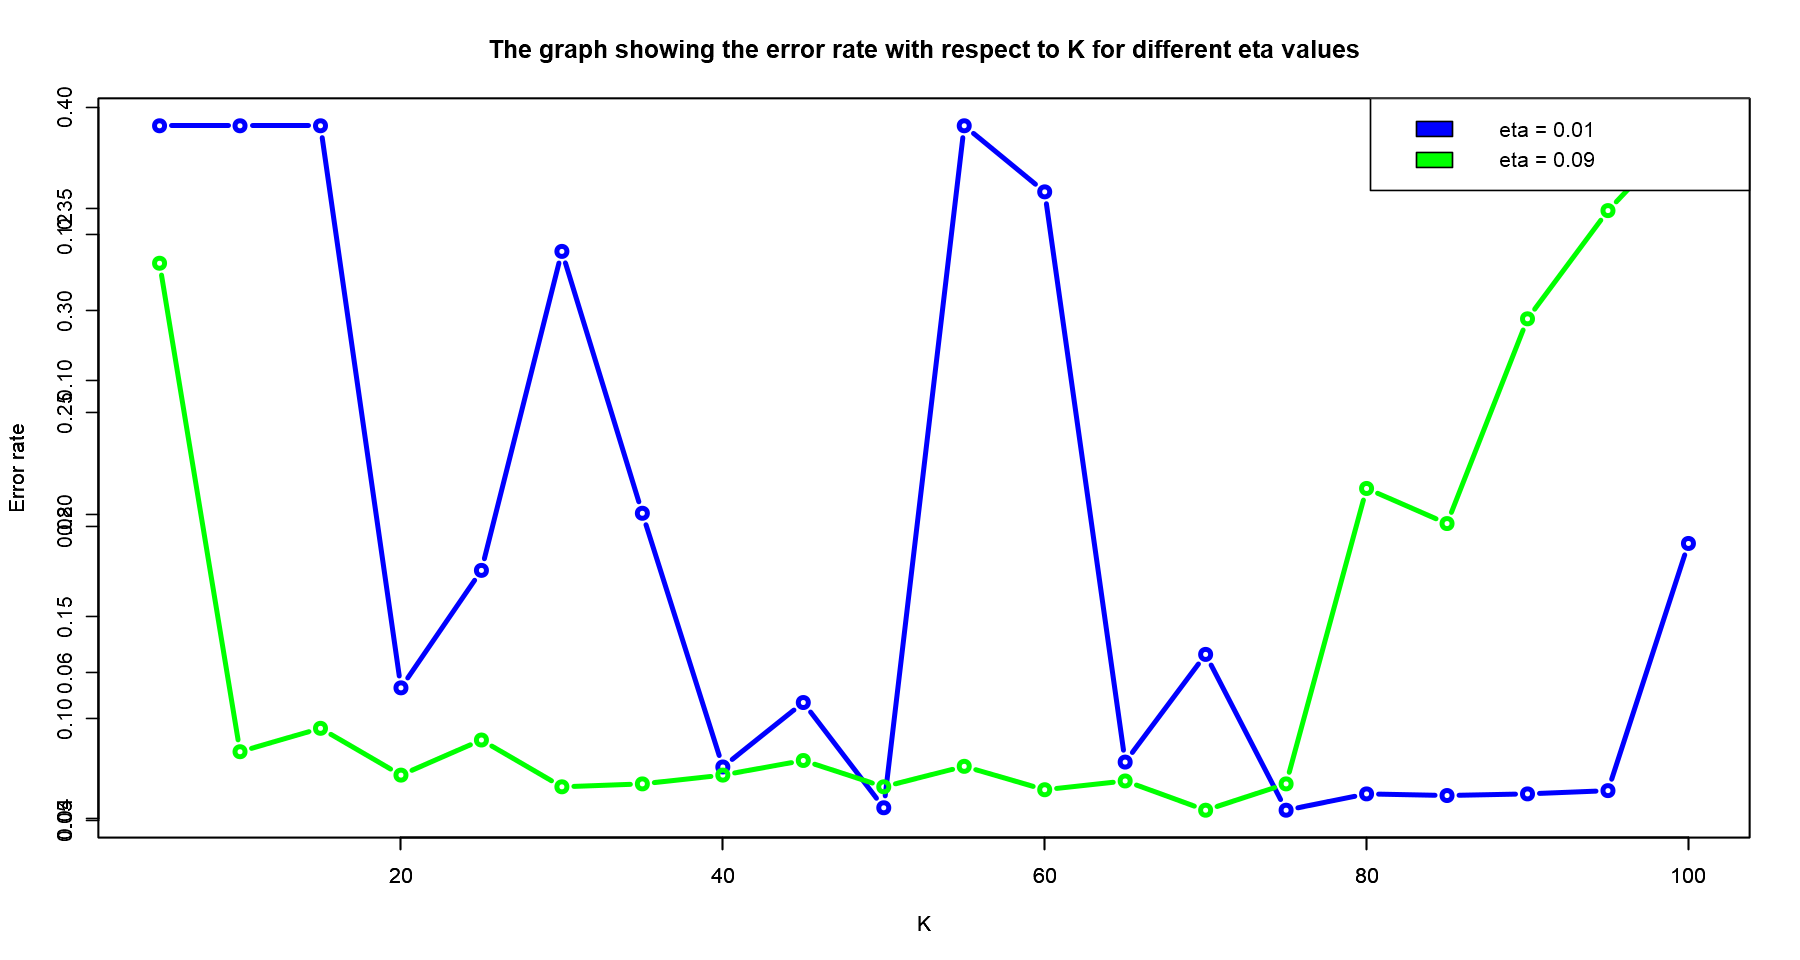

In [33]:
options(repr.plot.width = 15, repr.plot.height = 8)
plot(error_eta1$K, error_eta1$Test, type = "b", col = "blue", xlab = "K" , ylab = "Error rate", lwd = 3)
par(new = TRUE)
plot(error_eta2$K, error_eta2$Test, type = "b", col = "green", xlab = "K" , ylab = "Error rate", lwd = 3)
title("The graph showing the error rate with respect to K for different eta values")
legend(x = "topright", legend = c("eta = 0.01", "eta = 0.09"), fill = c("blue", "green"))

### Finding the best combination of K and eta(mu)

In [43]:
#creating an empty dataframe of eta1 = 0.01
nn_eta1 <- data.frame('eta1' = rep(0.01,20))

In [45]:
#for eta = 0.01, bind even the eta values to the obtained test error dataframe of k, test with respect to eta1 = 0.01
dataframe_nn_eta1 <- cbind(error_eta1, nn_eta1)
head(dataframe_nn_eta1)

K  Test   eta1
1  5 0.3908 0.01
2 10 0.3908 0.01
3 15 0.3908 0.01
4 20 0.1152 0.01
5 25 0.1728 0.01
6 30 0.3292 0.01

In [46]:
#creating an empty dataframe of eta2 = 0.09
nn_eta2 <- data.frame('eta2' = rep(0.09,20))
#for eta = 0.01, bind even the eta values to the obtained test error dataframe of k, test with respect to eta1 = 0.09
dataframe_nn_eta2 <- cbind(error_eta2, nn_eta2)
head(dataframe_nn_eta2)

K  Test   eta2
1  5 0.1160 0.09
2 10 0.0492 0.09
3 15 0.0524 0.09
4 20 0.0460 0.09
5 25 0.0508 0.09
6 30 0.0444 0.09

In [47]:
#renaming the dataframe names and printing it for eta1 = 0.01, eta2 = 0.09
names(dataframe_nn_eta1)[names(dataframe_nn_eta1) == "Test"] <- "Test_eta1"
names(dataframe_nn_eta2)[names(dataframe_nn_eta2) == "Test"] <- "Test_eta2"
head(dataframe_nn_eta1)
head(dataframe_nn_eta2)

K  Test_eta1 eta1
1  5 0.3908    0.01
2 10 0.3908    0.01
3 15 0.3908    0.01
4 20 0.1152    0.01
5 25 0.1728    0.01
6 30 0.3292    0.01

K  Test_eta2 eta2
1  5 0.1160    0.09
2 10 0.0492    0.09
3 15 0.0524    0.09
4 20 0.0460    0.09
5 25 0.0508    0.09
6 30 0.0444    0.09

In [48]:
#merging the dataframes with eta1 = 0.o1 and eta2 = 0.09, with respect to k
nn_eta1_eta2_testerrors <- merge(dataframe_nn_eta1, dataframe_nn_eta2, by = c("K"))
head(nn_eta1_eta2_testerrors)

K  Test_eta1 eta1 Test_eta2 eta2
1  5 0.3908    0.01 0.1160    0.09
2 10 0.3908    0.01 0.0492    0.09
3 15 0.3908    0.01 0.0524    0.09
4 20 0.1152    0.01 0.0460    0.09
5 25 0.1728    0.01 0.0508    0.09
6 30 0.3292    0.01 0.0444    0.09

In [54]:
#obtaining the row, which has lowest error rate with respect to eta1
eta1_k <- apply(nn_eta1_eta2_testerrors['Test_eta1'],2,min)
eta1_k_lower_test_error <- nn_eta1_eta2_testerrors[which(nn_eta1_eta2_testerrors['Test_eta1'] == eta1_k),]
eta1_k_lower_test_error

K  Test_eta1 eta1 Test_eta2 eta2
15 75 0.0552    0.01 0.0448    0.09

In [55]:
#obtaining the row which has lowest error rate with respect to eta2
eta2_k <- apply(nn_eta1_eta2_testerrors['Test_eta2'],2,min)
eta2_k_lower_test_error <- nn_eta1_eta2_testerrors[which(nn_eta1_eta2_testerrors['Test_eta2'] == eta2_k),]
eta2_k_lower_test_error

K  Test_eta1 eta1 Test_eta2 eta2
14 70 0.1316    0.01 0.0412    0.09

### Finding Best combination of model?

Now, the best model from above two dataframes which has lowest error rates for eta1 = 0.01 and eta2 = 0.09  would be finally at k = 70 and eta = 0.09 i.e. at eta2.

### plot the test data while the points are colored with their estimated class labels using the best model that you have selected; attach the plot to your PDF report.

In [36]:
set.seed(1234)
#building the model with best k and learning rate
list[W11, W22, b11, b22]<- nn.build(70, X1.t, T1, plotting = FALSE, epoch.max=1000, eta = 0.09, lambda = 0.01)
#predicting the class lables of test data with best model
predicted_labels_bestmodel <- nn.predict(X2.t, W11, W22, b11, b22)

In [37]:
head(predicted_labels_bestmodel)

1 2  3  4 5 6 7 8 9 10 ... 2491 2492 2493 2494 2495 2496 2497 2498 2499
[1,] 1 -1 -1 1 1 1 1 1 1 -1 ... 1    1    -1   1    1    1    -1   1    -1  
     2500
[1,] -1

In [38]:
#transposing the estimated class labels and printing the first few lines of it
predictions_bestmodel_test <- t(predicted_labels_bestmodel)
head(predictions_bestmodel_test)

[,1]
1  1  
2 -1  
3 -1  
4  1  
5  1  
6  1

In [39]:
#changing the column names of predicted class labels
colnames(predictions_bestmodel_test) <- c("predictions_labels") 
head(predictions_bestmodel_test)

predictions_labels
1  1                
2 -1                
3 -1                
4  1                
5  1                
6  1

In [40]:
#binding into one dataframe with x1,x2 of test data points i.e data and the truth and predicted class labels
df_bestmodel_test <- cbind(X2, T2, predictions_bestmodel_test)
head(df_bestmodel_test)

x1         x2         Truth_values predictions_labels
1  0.4973951 -0.5492695  1            1                
2  0.2139925  0.6141635 -1           -1                
3 -0.4656182  0.5093878  1           -1                
4 -0.1380630  0.8841224  1            1                
5  0.6593270  0.3378901  1            1                
6  0.6670054  0.6012369  1            1

In [42]:
#plotting the graph, where the test data is colored with estimated class labels of best built model
ggplot(data = df_bestmodel_test, aes(x = x1, y = x2, label = ifelse(Truth_values == 1, "+", "-"), color = as.factor(predictions_labels))) +
        geom_text(size = 5,alpha=0.5) + scale_color_discrete(guide = guide_legend(title = 'Prediction')) +
        ggtitle("Classification of labels where labels being colored with estimated class labels from best built model of neural network") +
        labs(x = "x1", y = "x2")+ 
        theme_minimal()

In [43]:
#trying to find the missclassification rates of neural network model, so that it could be understood which model is better in classifying the non-linear
#separable data i.e if it is perceptron (or) if it is neural network
missclassification_count_bestmodel = 0
for (row in 1:nrow(df_bestmodel_test)) {
    
    true_labels <- df_bestmodel_test[row, "Truth_values"]
    predicted_labels  <- df_bestmodel_test[row, "predictions_labels"]

    if(true_labels != predicted_labels) {
        
        missclassification_count_bestmodel = missclassification_count_bestmodel + 1 
    }
}
missclassification_count_bestmodel 

[1] 109

In [44]:
#printing number of missclassifications in best neural network model
cat("Total number of missclassifications obtained in neural network model for k = 70 and eta = 0.09 is ")
cat(missclassification_count_bestmodel)

Total number of missclassifications obtained in neural network model for k = 70 and eta = 0.09 is 109